In [0]:

import pandas as pd
import numpy as np

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory data analysis

In [12]:
train_data = pd.read_csv('data/train_data.tsv', sep='\t')
train_data.rename( columns={'Unnamed: 0':'id'}, inplace=True )
test_data = pd.read_csv('data/test_data.tsv', sep='\t')
test_data.rename( columns={'Unnamed: 0':'id'}, inplace=True )

train_data.head()



,id,ru_name,eng_name,answer
0,0,"Общество с ограниченной ответственностью ""ЕВА""","""Langford Travel""",False
1,1,"Общество с ограниченной ответственностью ""ФОРВ...",AMARA,False
2,2,"ООО ""Меллита""","""MAX-TRANS"" Limited liability company",False
3,3,"ЗАКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПЕТОЙЛ"" (открыт...","""Computational Technologies"" Ltd",False
4,4,"Общество с ограниченной ответственностью ""Конц...","""Ad.Arty""",False


In [13]:
print('Number of samples in train data: ', len(train_data))
print('Number of samples in test data', len(test_data))

Number of samples in train data:  3983203
Number of samples in test data 996052


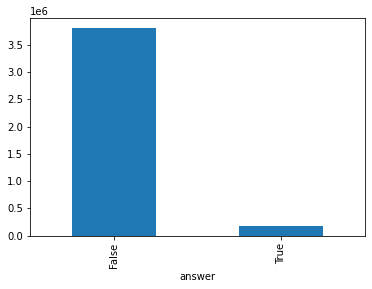

In [14]:
train_data.groupby("answer")['id'].count().plot.bar()

mean-train_ru 40.55 std-train_ru 27.96  max-train_ru 515.00 
mean-train_eng 26.27 std-train_eng 17.09  max-train_eng 260.00 


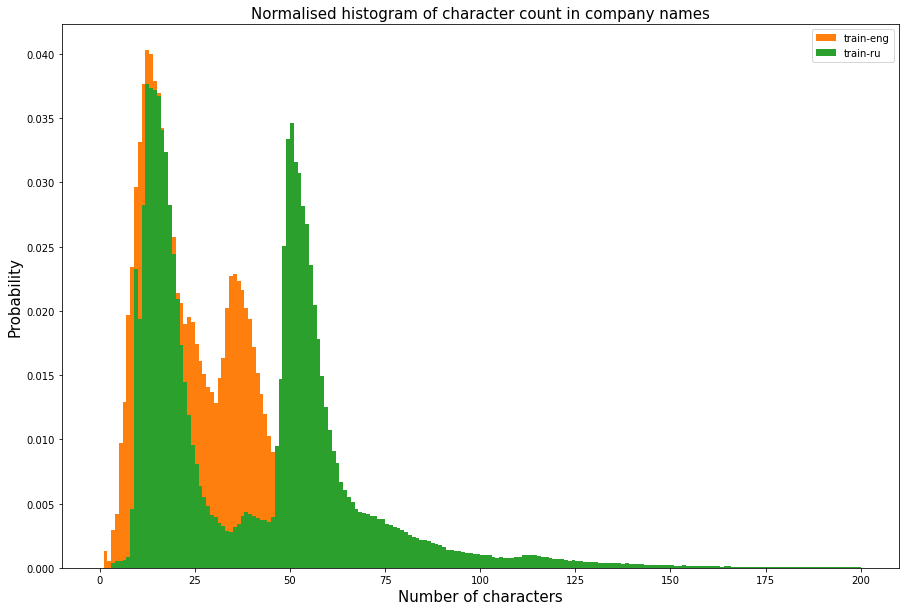

In [15]:
pal = sns.color_palette()

train_ru = pd.Series(train_data['ru_name'].tolist()).astype(str)
train_eng = pd.Series(train_data['eng_name'].tolist()).astype(str)

dist_train_ru = train_ru.apply(len)
dist_train_eng = train_eng.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist_train_eng, bins=200, range=[0, 200], color=pal[1], density=True, label='train-eng')
plt.hist(dist_train_ru, bins=200, range=[0, 200], color=pal[2], density=True, label='train-ru')

plt.title('Normalised histogram of character count in company names', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train_ru {:.2f} std-train_ru {:.2f}  max-train_ru {:.2f} '.format(dist_train_ru.mean(), 
                          dist_train_ru.std(), dist_train_ru.max()))
print('mean-train_eng {:.2f} std-train_eng {:.2f}  max-train_eng {:.2f} '.format(dist_train_eng.mean(), 
                          dist_train_eng.std(), dist_train_eng.max()))

mean-train-ru 4.48 std-train-ru 2.40 mean-train-eng 3.33 std-train-eng 2.01 max-train-ru 54.00 max-test-eng 35.00


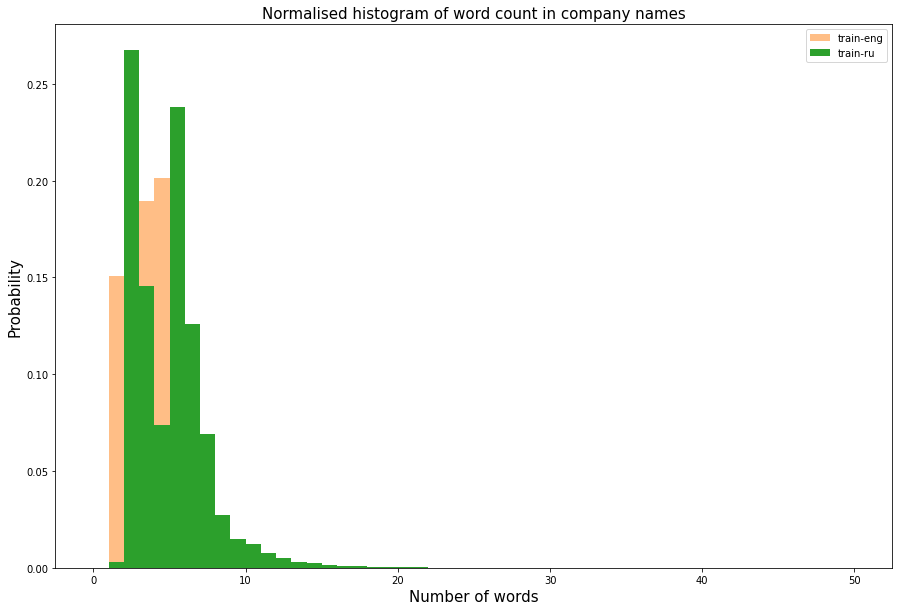

In [16]:
dist_train_ru = train_ru.apply(lambda x: len(x.split(' ')))
dist_train_eng = train_eng.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))

plt.hist(dist_train_eng, bins=50, range=[0, 50], color=pal[1], density=True, alpha=0.5, label='train-eng')
plt.hist(dist_train_ru, bins=50, range=[0, 50], color=pal[2], density=True, label='train-ru')
plt.title('Normalised histogram of word count in company names', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train-ru {:.2f} std-train-ru {:.2f} mean-train-eng {:.2f} std-train-eng {:.2f} max-train-ru {:.2f} max-test-eng {:.2f}'.format(dist_train_ru.mean(), 
                          dist_train_ru.std(), dist_train_eng.mean(), dist_train_eng.std(), dist_train_ru.max(), dist_train_eng.max()))

(-0.5, 499.5, 299.5, -0.5)

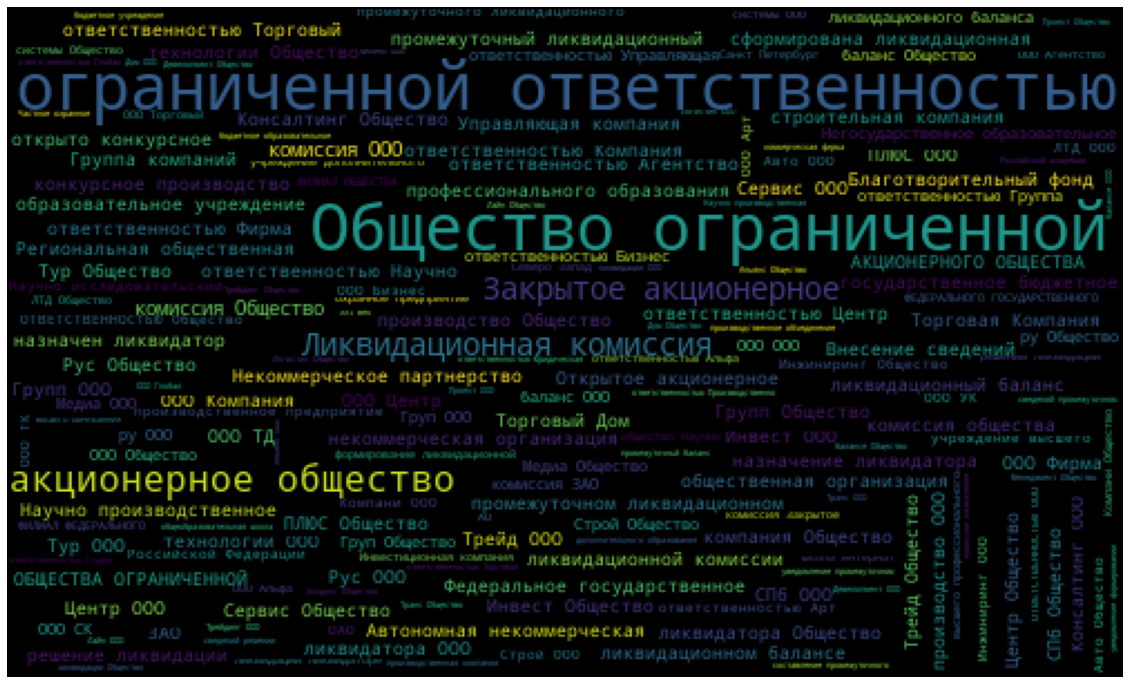

In [17]:

cloud = WordCloud(width=500, height=300).generate(" ".join(train_ru.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 499.5, 299.5, -0.5)

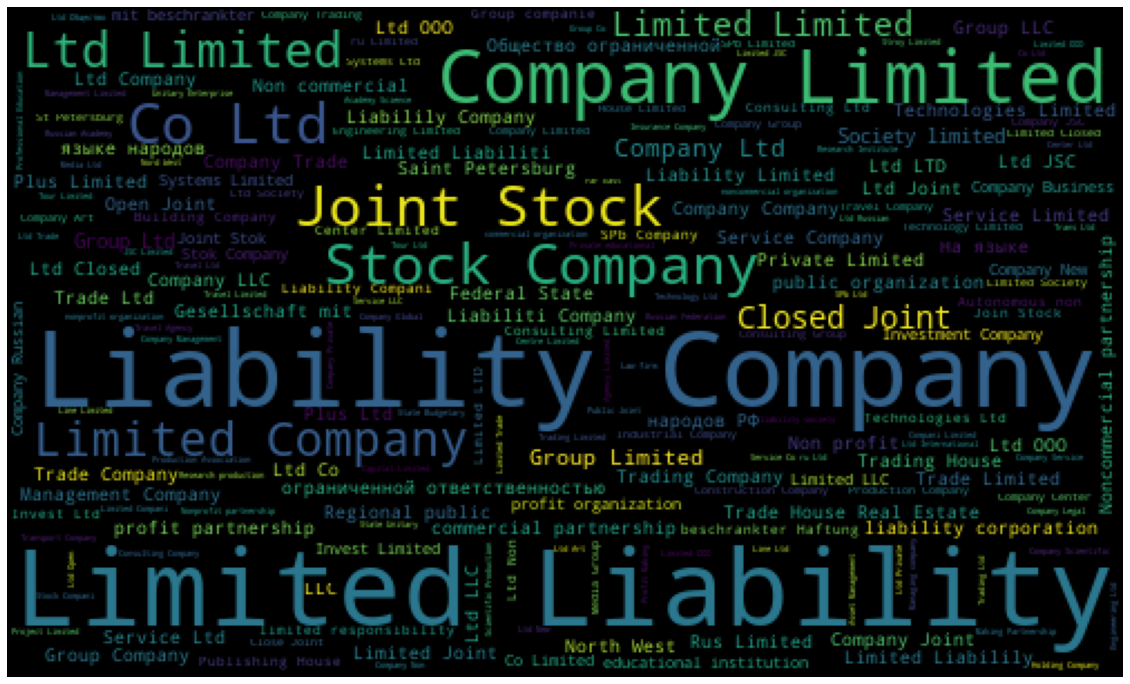

In [18]:
cloud = WordCloud(width=500, height=300).generate(" ".join(train_eng.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [25]:
ruids = pd.Series(train_data['ru_name'].tolist())
unique_rus = len(np.unique(ruids))
rus_morethan_onetime = np.sum(ruids.value_counts() > 1)
print ('Total number of  russian company names are: {}\n'.format(unique_rus))


print ('Number of unique russian company names that appear more than one time: {} ({}%)\n'.format(rus_morethan_onetime,rus_morethan_onetime/unique_rus*100))

print ('Max number of times a single russian company name is repeated: {}\n'.format(max(ruids.value_counts()))) 


Total number of  russian company names are: 985936

Number of unique russian company names that appear more than one time: 870046 (88.24568734684604%)

Max number of times a single russian company name is repeated: 743



In [26]:
engids = pd.Series(train_data['eng_name'].tolist())
unique_engs = len(np.unique(engids))
engs_morethan_onetime = np.sum(engids.value_counts() > 1)
print ('Total number of  english company names are: {}\n'.format(unique_engs))


print ('Number of unique english company names that appear more than one time: {} ({}%)\n'.format(engs_morethan_onetime,engs_morethan_onetime/unique_engs*100))

print ('Max number of times a single english company name is repeated: {}\n'.format(max(engids.value_counts()))) 


Total number of  english company names are: 499903

Number of unique english company names that appear more than one time: 498119 (99.64313076736887%)

Max number of times a single english company name is repeated: 5572



In [21]:
print('Number of unique intersection in english company names  between test and train set: ', len(np.intersect1d(train_data.eng_name.unique(), test_data.eng_name.unique())))

Number of unique intersection in english company names  between test and train set:  6646


In [22]:
print('Number of unique intersection in russian company names  between test and train set: ', len(np.intersect1d(train_data.ru_name.unique(), test_data.ru_name.unique())))

Number of unique intersection in russian company names  between test and train set:  35399


In [0]:
len(test_data.ru_name.unique())

264552

In [27]:
print('Number of unique english company names which answer is True: ', len(train_data[train_data.answer==True].eng_name.unique()))

Number of unique english company names which answer is True:  159328


In [28]:
print('Number of unique russian company names which answer is True: ', len(train_data[train_data.answer==True].ru_name.unique()))

Number of unique russian company names which answer is True:  170839


In [29]:
print('Total number of True answers in train: ', len(train_data[train_data.answer==True]))

Total number of True answers in train:  182876
